<a href="https://colab.research.google.com/github/Omatsola23/engine-status/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#installing panda profiling
!pip install pandas-profiling

In [3]:
#importing all machine learning packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport

In [4]:
#reading the dataset
engine = pd.read_csv('/content/engine_data.csv')

In [5]:
#dataset row and column display
engine.head(100)

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0          700          2.493592      11.790927          3.178981   
1          876          2.941606      16.193866          2.464504   
2          520          2.961746       6.553147          1.064347   
3          473          3.707835      19.510172          3.727455   
4          619          5.672919      15.738871          2.052251   
..         ...               ...            ...               ...   
95         585          2.833767       6.689134          2.244057   
96         704          2.267873      10.012716          2.147507   
97         500          2.430457       5.691030          2.337000   
98         577          4.075805       4.969335          2.357238   
99         829          5.460025       6.394026          2.970531   

    lub oil temp  Coolant temp  Engine Condition  
0      84.144163     81.632187                 1  
1      77.640934     82.445724                 0  
2      77.752266     79.645777                 1  
3      74.129907     71.774629                 1  
4      78.396989     87.000225                 0  
..           ...           ...               ...  
95     81.624664     70.611340                 0  
96     76.248174     88.933173                 1  
97     75.488017     82.795423                 1  
98     76.273093     76.507871                 1  
99     75.662226     79.240116                 1  

[100 rows x 7 columns]

In [6]:
#describig the dataset
engine.describe()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421          0.000000  
50%       76.817350     78.346662          1.000000  
75%       78.071691     82.915411          1.000000  
max       89.580796    195.527912          1.000000

In [7]:
#checking the dataset size
engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [8]:
#running a Ydata on the dataset
profile = ProfileReport(engine, title='ENGINE CONDITION DETECTION APP')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
#importing package for graphs
import plotly.express as px

In [24]:
#line chart plot representation for the dataset
fig = px.line(engine, x='Engine Condition', y=['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp'], title='Automotive Vehicle Engine Health')
fig.show()

In [9]:
#running test using logistic regression model
x= engine[["Engine rpm","Lub oil pressure","Fuel pressure","Coolant pressure","lub oil temp","Coolant temp"]]
y= engine["Engine Condition"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)
lg=LogisticRegression()
lg.fit(x_train, y_train)
predicted = lg.predict(x_test)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.3328458613629716
R squared:  -0.4407520988554454


In [10]:
#running prediction
prediction = lg.predict(x_test)

In [11]:
#checking logistic regression model accuracy
print('Accuracy=',accuracy_score(y_test, prediction))

Accuracy= 0.6671541386370283


In [12]:
#importing packages for classification report
from sklearn.metrics import classification_report

In [13]:
#printing classification report for the prediction
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39      2477
           1       0.69      0.88      0.77      4361

    accuracy                           0.67      6838
   macro avg       0.63      0.59      0.58      6838
weighted avg       0.65      0.67      0.63      6838



In [14]:
#running test using linear regression model
x= engine[["Engine rpm","Lub oil pressure","Fuel pressure","Coolant pressure","lub oil temp","Coolant temp"]]
y= engine["Engine Condition"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lig=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lig.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lig.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.2986903702859225
R squared:  -0.292907101609007


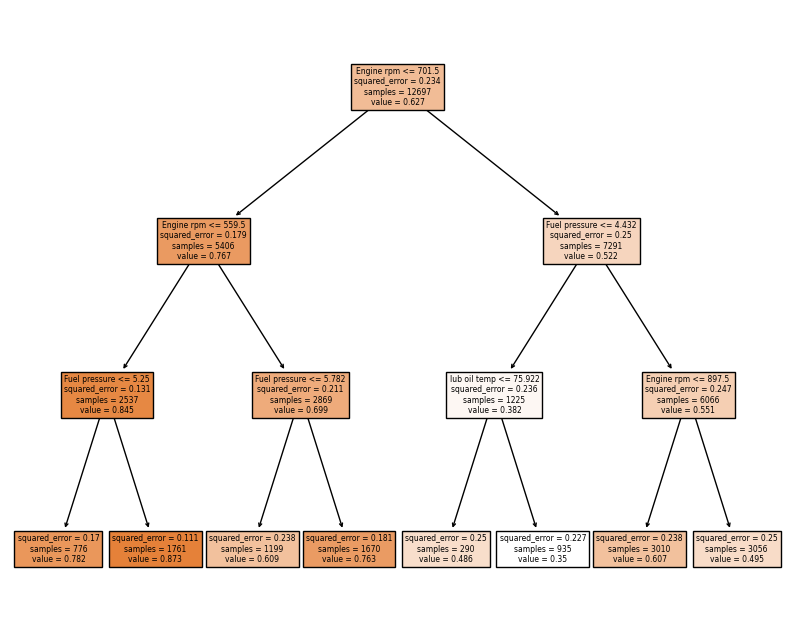

In [15]:
#running test using decision tree regression model
x= engine[["Engine rpm","Lub oil pressure","Fuel pressure","Coolant pressure","lub oil temp","Coolant temp"]]
y= engine["Engine Condition"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
decision_tree = DecisionTreeRegressor(max_depth=3)  # Initialize with max_depth hyperparameter
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
plt.figure(figsize=(10, 8))
plot_tree(decision_tree, feature_names=x.columns, filled=True)
plt.show()

In [16]:
#running test using random forest regression model
x= engine[["Engine rpm","Lub oil pressure","Fuel pressure","Coolant pressure","lub oil temp","Coolant temp"]]
y= engine["Engine Condition"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10)  # Example with 100 trees and max depth of 10
random_forest.fit(x_train, y_train)
predicted = random_forest.predict(x_test)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.20629639764618715
R squared:  0.10702820014655878


In [18]:
#testing the model using logistic regression because it performed better than other models
user_input1=int(input('Engine rpm '))
user_input2=int(input('Lub oil pressure '))
user_input3=int(input('Fuel pressure '))
user_input4=int(input('Coolant pressure '))
user_input5=int(input('lub oil temp '))
user_input6=int(input('Coolant temp '))
predictionx=[[user_input1,user_input2,user_input3,user_input4,user_input5,user_input6]]
predictx = lg.predict(predictionx)
if predictx==1:
  print("Engine is good")
else:
  print("Engine is not good")

Engine rpm 64
Lub oil pressure 34
Fuel pressure 23
Coolant pressure 12
lub oil temp 34
Coolant temp 23
Engine is good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
#importing pickle to save model to Pycharm
!pip install pypickle

In [20]:
#saving the model for Pycharm
import pypickle as py
py.save("lg.pkl",lg)

[pypickle] Pickle file saved: [lg.pkl]


True